In [1]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import cm
import numpy as np

In [6]:
def generate_dataset(
        n_samples=1000,
        n_features=2,
        n_centers=4,
        cluster_std=1.0,
        center_box=(-10.0, 10.0),
        random_state=None
):
    """
    Generate samples distributed onto clusters with given params
    Args:
        n_samples: number of samples you want to generate
        n_features: dimension of dataset
        n_centers: number of clusters
        cluster_std: std of samples
        center_box: range of cluster`s centers
        random_state: seed

    Returns:
        Tuple of samples coordinates, labels and centers of generated clusters
    """
    # create generator from seed
    generator = np.random.RandomState(random_state)

    # generate coordinates of cluster center
    center_coords = generator.uniform(center_box[0], center_box[1], size=(n_centers, n_features))

    # create vector of std values
    cluster_std = np.full(n_centers, cluster_std)

    # get number of samples which belongs to each cluster
    n_samples_per_center = [int(n_samples // n_centers)] * n_centers
    for i in range(n_samples % n_centers):
        n_samples_per_center[i] += 1

    # generate coordinates of each sample
    coords = np.concatenate(
        [
            generator.normal(loc=center_coords[i], scale=std, size=(n, n_features))
            for i, (n, std) in enumerate(zip(n_samples_per_center, cluster_std))
        ]
    )
    labels = np.array([i for i, n in enumerate(n_samples_per_center) for _ in range(n)])
    return coords, labels, center_coords


def partition_matrix(samples, centers, m=2):
    """
    Calculate partition matrix based on formula from here:
    https://en.wikipedia.org/wiki/Fuzzy_clustering#Algorithm
    Args:
        samples: coordinate of samples
        centers: coordinates of cluster`s centers
        m: hyperparameter of partition matrix

    Returns:
        partition matrix
    """
    degree = 2/ (m - 1)
    
    samples = samples[:, np.newaxis]
    centers = centers[np.newaxis, :]
    norm_in_degree = np.linalg.norm(samples - centers, axis=2) ** degree
    
    return 1 / (norm_in_degree * np.sum(1. / norm_in_degree, axis=1, keepdims=True))


def plot_samples(samples, labels):
    """
    Plot generated dataset
    Args:
        samples: coordinates of samples
        labels: sample`s labels

    Returns:
        None
    """
    plt.figure(1, figsize=(8, 8))
    
    colors = cm.rainbow(np.linspace(0, 1, len(np.unique(labels)))) # noqa
    for lbl, color in enumerate(colors):
        plt.scatter(samples[labels==lbl, 0], samples[labels==lbl, 1], color=color, marker='.', s=10)

    
def mod_entropy(u, n_samples, n_clusters):
    """
    Calculate modified entropy
    Args:
        u: partition matrix
        n_samples: number of samples
        n_clusters: number of clusters

    Returns:
        Modified entropy
    """
    pe = - np.sum(np.multiply(u, np.log(u))) / n_samples
    return pe / np.log(n_clusters)
    
def perform_generation(*args, **kwargs):
    """
    Perform one generation with given params
    Args:
        *args: pass into generate_dataset function
        **kwargs: pass into generate_dataset function

    Returns:
        Modified entropy of generated dataset
    """
    samples, labels, centers = generate_dataset(*args, **kwargs)
    
    plot_samples(samples, labels)
    u = partition_matrix(samples, centers)
    entropy = mod_entropy(u, samples.shape[0], centers.shape[0])

    return entropy

# Кількість кластерів не співпадає з початковою кількістю кластерів

0.2659063336207813

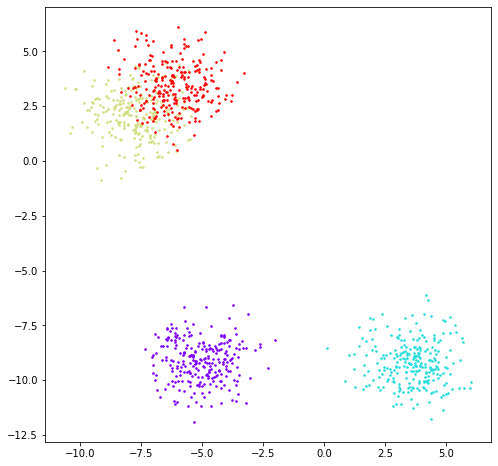

In [7]:
perform_generation(random_state=41, n_centers=4)

# Еталонна кластеризація

0.1484439421022151

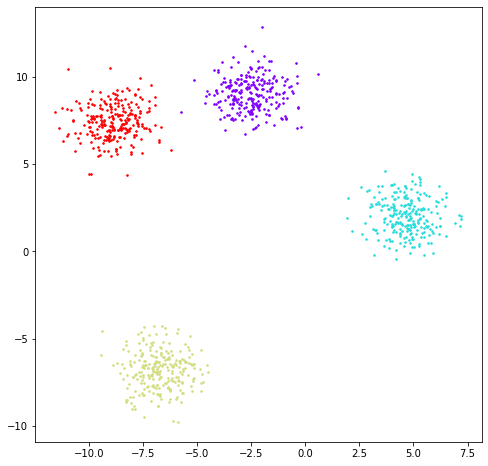

In [8]:
perform_generation(random_state=42, n_centers=4)

# Зашумлена кластеризація

0.3474352832076129

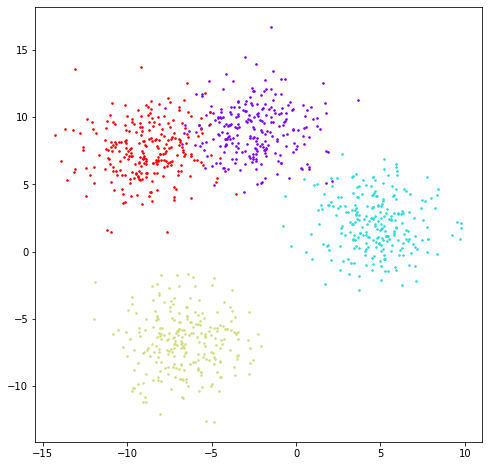

In [9]:
perform_generation(random_state=42, n_centers=4, cluster_std=2)

# Висновок
Під час виконання даної лабораторної роботи я навчився працювати з бібліотеками `numpy` та `matplotlib`. В цій лобораторній роботі я використовував транслювання(broadcasting) для масивів, генератори випадкових чисел з бібліотеки `numpy` та базові функції для зображення точок на площині за допомогою бібліотеки `matplotlib`. Транслювання значно полегшує та пришвидшує обчислення операцій над тензорами. У ході роботи було згенеровано 3 варіанти кластерів та для кожного з них було обчислено матрицю розбиття точок на кластери і модифіковану ентропію. У першому варіанті кількість кластерів не співпадає з початковою кількістю кластерів, що було використано для генерації. У другому випадку було показано еталонну кластеризацію, а у третьому - зашумлена генерація, в результаті чого деякі точки можна віднести до іншого кластера. Модифікована ентропія була найменшою у другому варіанті, коли генерація кластерів була еталонною.